In [8]:
# define imports
import numpy as np
from skimage import io, color
from skimage.transform import resize
from tqdm import tqdm_notebook

# define methods
def load_dataset(load_pattern):
    return io.imread_collection(load_pattern)    

def downscale_dataset(im_collection, output_shape):
    im_scale = []
    
    for im in im_collection:
        im = resize(im, output_shape, mode='constant', anti_aliasing=True)
        im_scale.append(im)
        
    return im_scale

def rgbToGrey(im_collection):
    im_grey = []
    
    for im in im_collection:
        im_grey.append(color.rgb2grey(im))
        
    return im_grey

def calc_hat_y(x, y):
    hat_beta_i = np.dot(np.dot(np.linalg.pinv(np.dot(x.T, x)), x.T), y)
    hat_y_i = np.dot(x, hat_beta_i)
    
    return hat_y_i

def calc_dist_y(y, h):
    return np.linalg.norm(y - h)

def model_summary(y_test, y_pred):
    print('Model summary...')
    print('Test Images:', len(y_test))
    print('Predicted:', len(y_pred))
    print('Accuracy:', round((len(y_pred) / len(y_test)) * 100, 2))
    
    if len(y_pred):
        print('Test Images that are predicted')
        io.imshow_collection(y_pred)
        
def model_train(x_train, y_test, train_size = 5):
    x_train_new = []
    hat_y_i = []
    
    print('Training model...')
    
    for i, x in tqdm_notebook(enumerate(x_train), total=len(x_train)):    
        x_train_new.append(x.flatten())

        if np.mod(i + 1, train_size) == 0:
            hat_y_i.append(calc_hat_y(np.array(x_train_new), y_test[np.int(i / train_size)].T).T)
            x_train_new = []
            
    return hat_y_i

def model_validate(y_test, hat_y_i, test_size = 3):
    y_pred = []
    distance = []
    
    print('Validating model...')
    
    for i, y in tqdm_notebook(enumerate(y_test), total=len(y_test)):
        for h in hat_y_i:
            dist = calc_dist_y(y, h)
            distance.append(dist)

        print('Image:', i + 1)
        print('Predicted Class:', np.argmin(distance) + 1)

        if np.int(i / test_size) == np.argmin(distance):
            y_pred.append(Y_test_raw[i])

        distance = []
    
    return y_pred

Training model...



Validating model...


Image: 1
Predicted Class: 1
Image: 2
Predicted Class: 1
Image: 3
Predicted Class: 1
Image: 4
Predicted Class: 2
Image: 5
Predicted Class: 2
Image: 6
Predicted Class: 2
Image: 7
Predicted Class: 3
Image: 8
Predicted Class: 3
Image: 9
Predicted Class: 3
Image: 10
Predicted Class: 3
Image: 11
Predicted Class: 4
Image: 12
Predicted Class: 3
Image: 13
Predicted Class: 5
Image: 14
Predicted Class: 5
Image: 15
Predicted Class: 5
Image: 16
Predicted Class: 6
Image: 17
Predicted Class: 6
Image: 18
Predicted Class: 6
Image: 19
Predicted Class: 7
Image: 20
Predicted Class: 7
Image: 21
Predicted Class: 7
Image: 22
Predicted Class: 8
Image: 23
Predicted Class: 8
Image: 24
Predicted Class: 8
Image: 25
Predicted Class: 9
Image: 26
Predicted Class: 9
Image: 27
Predicted Class: 9

Model summary...
Test Images: 27
Predicted: 25
Accuracy: 92.59
Test Images that are predicted


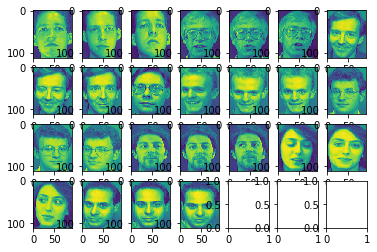

In [9]:
'''
AT&T Database
'''
# load dataset
X_train = load_dataset('C:/Users/msharaf/Desktop/ML/att_faces/s[0-9]/[1-5].pgm')
Y_train = load_dataset('C:/Users/msharaf/Desktop/ML/att_faces/s[0-9]/6.pgm')
Y_test_raw = load_dataset('C:/Users/msharaf/Desktop/ML/att_faces/s[0-9]/[7-9].pgm')

# transform dataset
X_train = downscale_dataset(X_train, (10, 5))
Y_train = downscale_dataset(Y_train, (10, 5))
Y_test = downscale_dataset(Y_test_raw, (10, 5))

# train model
hat_y_i = model_train(X_train, Y_train)

# validate model
Y_pred = model_validate(Y_test, hat_y_i)
    
# model summary
model_summary(Y_test, Y_pred)